In [99]:
print("hello world")

hello world


In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [101]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [102]:
img_classes = os.listdir(train_path)
print(img_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [103]:
len(img_classes)

3

In [104]:
def plot_frist_image_from_each_class(path):
    
    img_classes = os.listdir(path)
    plt.figure(figsize = (13,13))
    for i , cat in enumerate(img_classes):
        image_path = path + '/' + img_classes[0]
        images_in_folder = os.listdir(image_path)
        
        first_img = images_in_folder[0]
        first_img_path = image_path + '/' + first_img

        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255


        plt.subplot(1,len(img_classes),i+1)
        plt.imshow(img_array)
        plt.title(img_classes[i])
        plt.axis('off')
    plt.show()

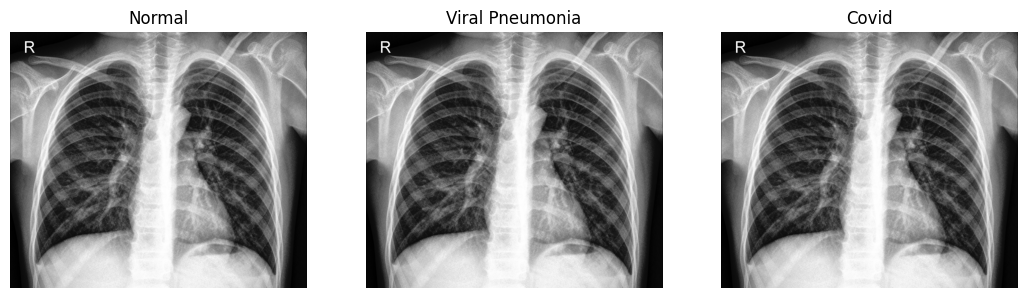

In [105]:
plot_frist_image_from_each_class(train_path)

In [106]:
#Data Augmentation
train_gen=ImageDataGenerator(rescale=1/255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.20,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
                            )

In [107]:
test_gen=ImageDataGenerator(rescale=1/255,
                            validation_split=0.2
                           )

In [108]:
train_data =train_gen.flow_from_directory(train_path,
                                         target_size=(250,250),
                                         batch_size=10,
                                         class_mode='categorical',
                                         subset='training'
                                         )

Found 201 images belonging to 3 classes.


In [109]:
test_data =test_gen.flow_from_directory(train_path,
                                         target_size=(250,250),
                                         batch_size=1,
                                         class_mode='categorical',
                                         subset='validation'
                                       )

Found 50 images belonging to 3 classes.


In [110]:
from keras.layers import Dropout
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(250,250,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [111]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [112]:
num_ep = 25
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [113]:


model_history=model.fit(
    train_data,
    epochs=855
    ,
    validation_data=test_data,
    callbacks=[early_stop]
)


Epoch 1/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 309ms/step - accuracy: 0.3456 - loss: 1.1096 - val_accuracy: 0.4400 - val_loss: 1.0915
Epoch 2/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.3933 - loss: 1.0940 - val_accuracy: 0.4400 - val_loss: 1.0646
Epoch 3/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.5265 - loss: 0.9481 - val_accuracy: 0.6600 - val_loss: 1.4030
Epoch 4/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.6085 - loss: 0.8985 - val_accuracy: 0.7000 - val_loss: 0.6721
Epoch 5/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.6160 - loss: 0.7001 - val_accuracy: 0.6800 - val_loss: 0.8427
Epoch 6/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.6124 - loss: 0.7270 - val_accuracy: 0.7000 - val_loss: 0.7495
Epoch 7/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.6929 - loss: 0.6416 - val_accuracy: 0.8200 - val_loss: 0.6540
Epoch 8/855
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.6689 - loss: 0.6284 - val_acc

In [114]:
from tensorflow.keras.models import save_model,load_model

In [115]:
model.save('/kaggle/working/Covid_19.h5')


In [116]:
save_model(model,'/kaggle/working/Covid_19_downloadable.h5')

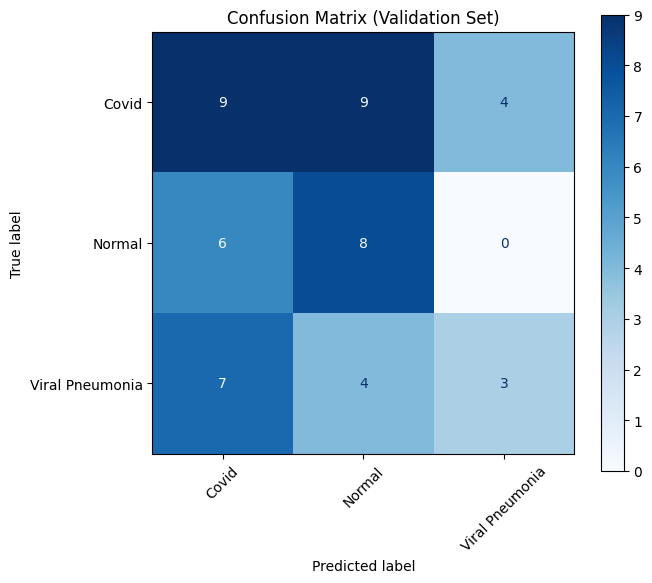

F1-score (macro): 0.38398268398268404
F1-score (weighted): 0.38799999999999996

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.41      0.41      0.41        22
         Normal       0.38      0.57      0.46        14
Viral Pneumonia       0.43      0.21      0.29        14

       accuracy                           0.40        50
      macro avg       0.41      0.40      0.38        50
   weighted avg       0.41      0.40      0.39        50



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

# ===== Predictions on validation set (test_data) =====
test_data.reset()
y_prob = model.predict(test_data, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes 

class_names = list(test_data.class_indices.keys())  

# ===== Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(7,6))
disp.plot(ax=ax, cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Validation Set)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== F1 Score (Macro + Weighted) =====
f1_macro = f1_score(y_true, y_pred, average="macro")
f1_weighted = f1_score(y_true, y_pred, average="weighted")
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

# ===== Classification Report =====
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
